In [85]:
#The dataset to be predicted (1 minute recording from muse-lsl)

dataset = "Ebb_n_flow_EEG_recording_2021-09-27-13.32.18.csv"

In [86]:
from joblib import dump, load

In [87]:
#The trained model 

model = load('model.joblib') 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [88]:
import shutil
import os
try: 
    shutil.rmtree("testing_data/")
    print("deleted testing_data/")
except FileNotFoundError:
    print("folder testing_data/ does not exist")
    
print("creating testing_data/")
os.mkdir("testing_data/")

deleted testing_data/
creating testing_data/


In [89]:
#Since the data is recorded using muse-lsl, rescaling is not required

import pandas as pd
import numpy as np



df = pd.read_csv(dataset)
df.to_csv("testing_data/muse_data_subset-lostinmigration-546728863431538125.csv", index=False) #giving random name, doesn't matter

In [90]:
#This is an example of how to predict using MuseMonitor data

import pandas as pd
import numpy as np

dataset = "dataset/original_data_main/muse_data_subset-relaxedeyesopen-2464149665160780886.csv"
df = pd.read_csv(dataset)
for electrode in ["TP9", "TP10", "AF7", "AF8", "Right AUX"]:    
    data = df[electrode]
    data = 0.48828125 * (np.array(data))
    data = 1680 * ((data) - data.min()) / (data.max() - data.min())
    df[electrode] = data
df.to_csv("testing_data/muse_data_subset-lostinmigration-546728863431538125.csv", index=False)

In [91]:
from EEG_generate_training_matrix import gen_training_matrix

data_directory_path = "testing_data/"
preprocessed_data_file_name = "out_main.csv"

print("generating training matrix...")
gen_training_matrix(data_directory_path, preprocessed_data_file_name, cols_to_ignore = -1)

generating training matrix...
Using file muse_data_subset-lostinmigration-546728863431538125.csv
resulting vector shape for the file (146, 989)
FINAL_MATRIX (146, 989)


In [92]:
nRowsRead = None # specify 'None' if want to read whole file
# mental-state.csv has 2360 rows in reality, but we are only loading/previewing the first 1000 rows
preprocessed_data_file_name = "out_main.csv"
df = pd.read_csv(preprocessed_data_file_name, delimiter=',', nrows = nRowsRead)
df.dataframeName = preprocessed_data_file_name
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 146 rows and 989 columns


In [93]:
X_muse_test = df.drop("Label", axis=1)

In [94]:
y_muse_pred = model.predict(X_muse_test)

In [95]:
y_muse_pred_proba = model.predict_proba(X_muse_test)

In [96]:
relaxed_percentage = y_muse_pred_proba[:,0].mean()

In [97]:
active_percentage = y_muse_pred_proba[:,1].mean()

In [98]:
print("relaxed percentage:",relaxed_percentage)
print("active percentage:", active_percentage)

relaxed percentage: 0.9369634703196346
active percentage: 0.0630365296803653


In [99]:
active_values = y_muse_pred_proba[:,1]
relaxed_values = y_muse_pred_proba[:,0]

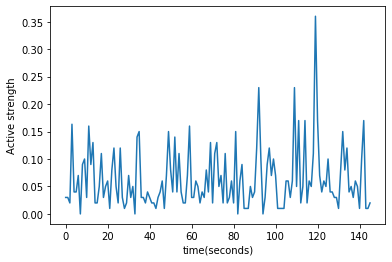

In [100]:
import matplotlib.pyplot as plt
plt.plot(active_values, label="active chart")
plt.ylabel('Active strength')
plt.xlabel('time(seconds)')
plt.show()


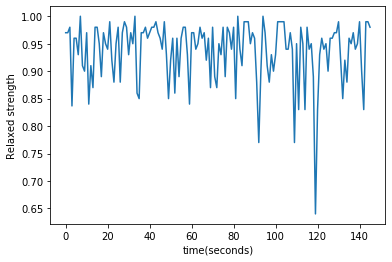

In [101]:
import matplotlib.pyplot as plt
plt.plot(relaxed_values, label="relaxed chart")
plt.ylabel('Relaxed strength')
plt.xlabel('time(seconds)')
plt.show()
